In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
import os #Dosya dizinleri ile alakali
import sklearn
import sklearn.metrics

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## 1.DATASET ANALYSE

In [2]:
def load_titanic():
    data = pd.read_csv("../Dataset/train.csv")
    return data

In [5]:
df=load_titanic()

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,NaN,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.45830,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.86250,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.07500,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.13330,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.07080,NaN,C


## 2.CATEGORIC VARIABLES ANALYSE: value_counts(), countplot ()

In [6]:
def cat_summary(data):
    cat_names=[col for col in data.columns if len(data[col].unique()) <10]
    count=0
    for col in cat_names:
        print(pd.DataFrame({col:data[col].value_counts(),"ratio":100*data[col].value_counts()/len(data)}), end="\n")
        sns.countplot(x=col, data=data)
        plt.show()
        count+=1
    print("Categoric variable is counted as :",count)

   Survived    ratio
0       549 61.61616
1       342 38.38384


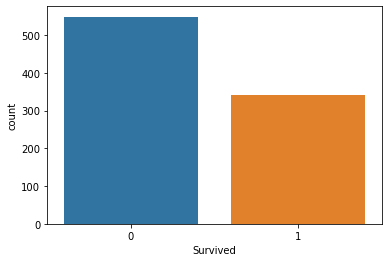

   Pclass    ratio
3     491 55.10662
1     216 24.24242
2     184 20.65095


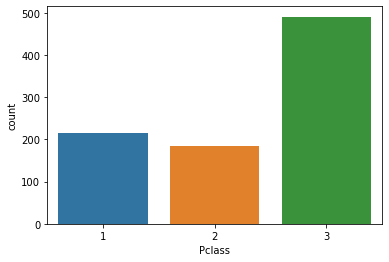

        Sex    ratio
male    577 64.75870
female  314 35.24130


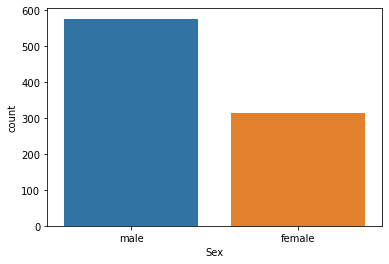

   SibSp    ratio
0    608 68.23793
1    209 23.45679
2     28  3.14254
4     18  2.02020
3     16  1.79574
8      7  0.78563
5      5  0.56117


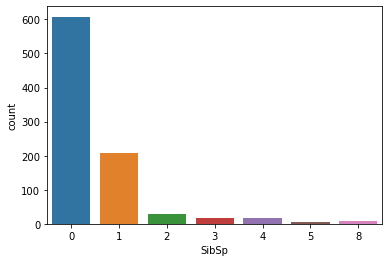

   Parch    ratio
0    678 76.09428
1    118 13.24355
2     80  8.97868
5      5  0.56117
3      5  0.56117
4      4  0.44893
6      1  0.11223


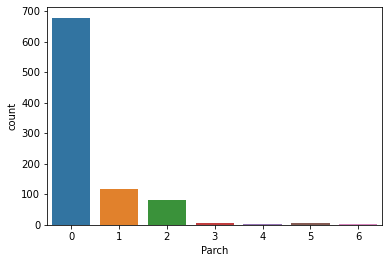

   Embarked    ratio
S       644 72.27834
C       168 18.85522
Q        77  8.64198


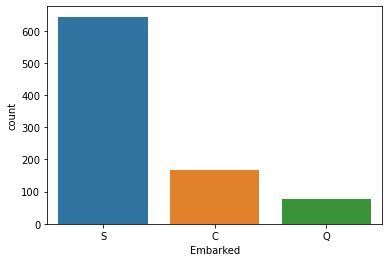

Categoric variable is counted as : 6


In [10]:
cat_summary(df)

In [8]:
cat_cols=[col for col in df.columns if df[col].dtype=="O"] 
cat_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [9]:
#we pointed out in this function the variables which is in cat_cols but not categoric due to more variables
def cats_summary(data, categorical_cols, number_of_classes=10):
    var_count = 0  # Kaç kategorik değişken olduğu raporlanacak
    vars_more_classes = []  # Belirli bir sayıdan daha fazla sayıda sınıfı olan değişkenler saklanacak.
    for var in data:
        if var in categorical_cols:
            if len(list(data[var].unique())) <= number_of_classes:  # sınıf sayısına göre seç
                print(pd.DataFrame({var: data[var].value_counts(),
                                    "Ratio": 100 * data[var].value_counts() / len(data)}),
                      end="\n\n\n")
                var_count += 1
            else:
                vars_more_classes.append(data[var].name)
    print('%d categorical variables have been described' % var_count, end="\n\n")
    print('There are', len(vars_more_classes), "variables have more than", number_of_classes, "classes", end="\n\n")
    print('Variable names have more than %d classes:' % number_of_classes, end="\n\n")
    print(vars_more_classes)


cats_summary(df, cat_cols)

        Sex    Ratio
male    577 64.75870
female  314 35.24130


   Embarked    Ratio
S       644 72.27834
C       168 18.85522
Q        77  8.64198


2 categorical variables have been described

There are 3 variables have more than 10 classes

Variable names have more than 10 classes:

['Name', 'Ticket', 'Cabin']


# 3. NUMERIC VARIABLES ANALYSE

In [18]:
num_cols=[col for col in df.columns if df[col].dtype!="O" and len(df[col].unique()) >10 and col not in "PassengerId " and
            col not in "Survived"]

In [14]:
num_cols

['Age', 'Fare']

In [15]:
def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")

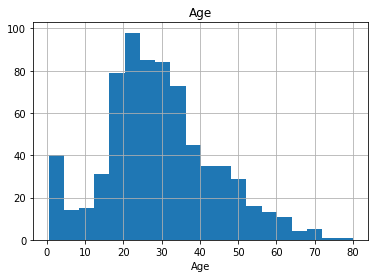

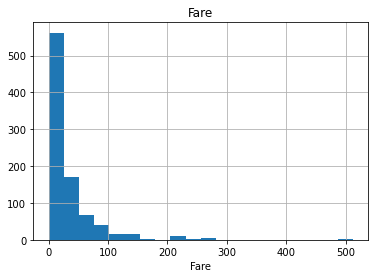

2 variables have been plotted


In [16]:
hist_for_nums(df,num_cols)

# 4. TARGET ANALYSE

In [10]:
def target_summary_with_cat(data, target):
    cats_names = [col for col in data.columns if len(data[col].unique()) < 10 and col not in target]
    for var in cats_names:
        print(pd.DataFrame({"TARGET_MEAN": data.groupby(var)[target].mean(),
              "COUNT":data.groupby(var)[target].count()}),end="\n\n\n")

In [34]:
target_summary_with_cat(df,"Survived")

        TARGET_MEAN  COUNT
Pclass                    
1           0.62963    216
2           0.47283    184
3           0.24236    491


        TARGET_MEAN  COUNT
Sex                       
female      0.74204    314
male        0.18891    577


       TARGET_MEAN  COUNT
SibSp                    
0          0.34539    608
1          0.53589    209
2          0.46429     28
3          0.25000     16
4          0.16667     18
5          0.00000      5
8          0.00000      7


       TARGET_MEAN  COUNT
Parch                    
0          0.34366    678
1          0.55085    118
2          0.50000     80
3          0.60000      5
4          0.00000      4
5          0.20000      5
6          0.00000      1


          TARGET_MEAN  COUNT
Embarked                    
C             0.55357    168
Q             0.38961     77
S             0.33696    644




In [19]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [11]:
def target_summary_with_nums(data, target):
    num_names = [col for col in data.columns if len(data[col].unique()) > 10
                 and df[col].dtypes != 'O'
                 and col not in target
                 and col not in "PassengerId"]

    for var in num_names:
        print(df.groupby(target).agg({var: np.mean}), end="\n\n\n")

In [23]:
target_summary_with_nums(df,"Survived")

              Age
Survived         
0        30.62618
1        28.34369


             Fare
Survived         
0        22.11789
1        48.39541




In [12]:
def analyse(data,target):
    cat_cols=[col for col in data.columns if len(data[col].unique()) <10 and data[col].dtype=="O"]
    num_cols=[col for col in data.columns if len(data[col].unique()) >10 and data[col].dtype!="O" and col not in target]
    
    print("cat_summary", cat_summary(df))
    print("hist_for_nums",hist_for_nums(df,num_cols))
    print("target_summary_with_cat",target_summary_with_cat(df, target))
    print("target_summary_with_nums", target_summary_with_nums(df, target))

   Survived    ratio
0       549 61.61616
1       342 38.38384


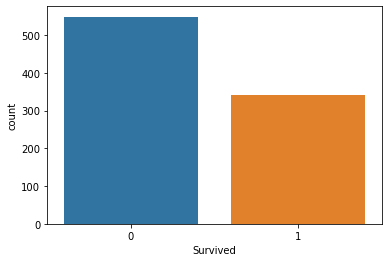

   Pclass    ratio
3     491 55.10662
1     216 24.24242
2     184 20.65095


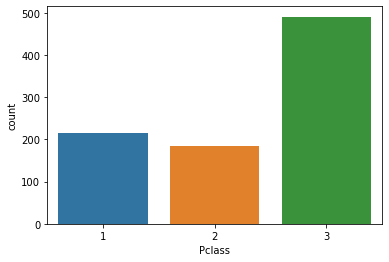

        Sex    ratio
male    577 64.75870
female  314 35.24130


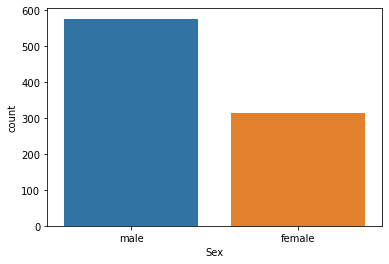

   SibSp    ratio
0    608 68.23793
1    209 23.45679
2     28  3.14254
4     18  2.02020
3     16  1.79574
8      7  0.78563
5      5  0.56117


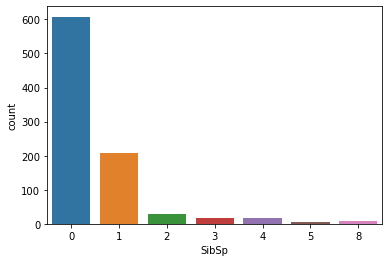

   Parch    ratio
0    678 76.09428
1    118 13.24355
2     80  8.97868
5      5  0.56117
3      5  0.56117
4      4  0.44893
6      1  0.11223


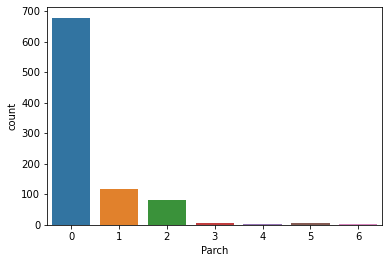

   Embarked    ratio
S       644 72.27834
C       168 18.85522
Q        77  8.64198


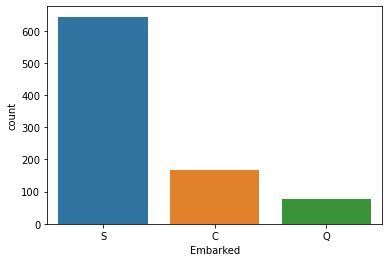

Categoric variable is counted as : 6
cat_summary None


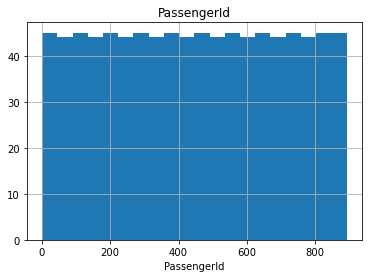

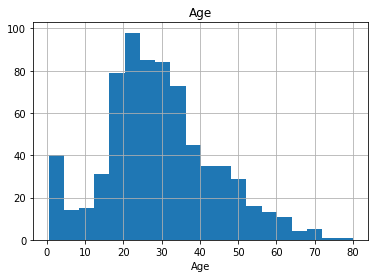

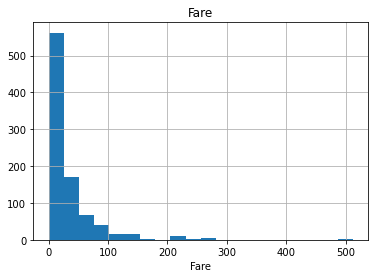

3 variables have been plotted
hist_for_nums None
        TARGET_MEAN  COUNT
Pclass                    
1           0.62963    216
2           0.47283    184
3           0.24236    491


        TARGET_MEAN  COUNT
Sex                       
female      0.74204    314
male        0.18891    577


       TARGET_MEAN  COUNT
SibSp                    
0          0.34539    608
1          0.53589    209
2          0.46429     28
3          0.25000     16
4          0.16667     18
5          0.00000      5
8          0.00000      7


       TARGET_MEAN  COUNT
Parch                    
0          0.34366    678
1          0.55085    118
2          0.50000     80
3          0.60000      5
4          0.00000      4
5          0.20000      5
6          0.00000      1


          TARGET_MEAN  COUNT
Embarked                    
C             0.55357    168
Q             0.38961     77
S             0.33696    644


target_summary_with_cat None
              Age
Survived         
0        30.62618
1 

In [40]:
analyse(df,"Survived")

# 5-DATA PRE-PROCESSING & FEATURE ENGINEERING


##  OUTLIERS ANALYSE (boxplot, threshold, drop, suppress)

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,NaN,S


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.00000,446.00000,257.35384,1.00000,223.50000,446.00000,668.50000,891.00000
Survived,891.00000,0.38384,0.48659,0.00000,0.00000,0.00000,1.00000,1.00000
Pclass,891.00000,2.30864,0.83607,1.00000,2.00000,3.00000,3.00000,3.00000
Age,714.00000,29.69912,14.52650,0.42000,20.12500,28.00000,38.00000,80.00000
SibSp,891.00000,0.52301,1.10274,0.00000,0.00000,0.00000,1.00000,8.00000
Parch,891.00000,0.38159,0.80606,0.00000,0.00000,0.00000,0.00000,6.00000
Fare,891.00000,32.20421,49.69343,0.00000,7.91040,14.45420,31.00000,512.32920


In [13]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [59]:
outlier_thresholds(df,"Age")

(-40.0, 104.0)

In [14]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")

In [75]:
has_outliers(df,"Fare")

In [17]:
num_names=[col for col in df.columns if df[col].dtype!="O" and len(df[col].unique())>10 and col not in "PassengerId"]

In [63]:
for col in num_names:
    has_outliers(df, col)

Fare yes


In [19]:
def has_outliers(dataframe, num_col_names, plot=False):
    variable_names = []

    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)

        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]

            print(col, ":", number_of_outliers)
            variable_names.append(col)

            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names

In [20]:
has_outliers(df,num_cols)

Fare : 20


['Fare']

In [66]:
df["Fare"]

0      7.25000
1     71.28330
2      7.92500
3     53.10000
4      8.05000
        ...   
886   13.00000
887   30.00000
888   23.45000
889   30.00000
890    7.75000
Name: Fare, Length: 891, dtype: float64

In [21]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [22]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [23]:
has_outliers(df,num_cols)

[]

In [77]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,NaN,S


##  MISSING VALUES ANALYSE
### - Find
### - go for randomness (Average credit card usage, does has any credit card?)
### - Figure the problem out (Drop, Assign, Assignment by Breakdown, Assignment based prediction)

### - CATCHING UP MISSING VALUES

In [24]:
cols_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

cols_with_na


['Age', 'Cabin', 'Embarked']

In [25]:
def missing_values_table(dataframe):
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    return variables_with_na

In [26]:
 missing_values_table(df)

          n_miss    ratio
Cabin        687 77.10000
Age          177 19.87000
Embarked       2  0.22000


['Age', 'Cabin', 'Embarked']

In [73]:
df=load_titanic()

In [74]:
cols_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
def missing_vs_target(dataframe, target, variable_with_na):
    temp_df = dataframe.copy()

    for variable in variable_with_na:
        temp_df[variable + '_NA_FLAG'] = np.where(temp_df[variable].isnull(), 1, 0)

    flags_na = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for variable in flags_na:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(variable)[target].mean(),
              "COUNT":temp_df.groupby(variable)[target].count()}),end="\n\n\n")
    return temp_df.head()

In [75]:
missing_vs_target(df, "Survived", cols_with_na)

             TARGET_MEAN  COUNT
Age_NA_FLAG                    
0                0.40616    714
1                0.29379    177


               TARGET_MEAN  COUNT
Cabin_NA_FLAG                    
0                  0.66667    204
1                  0.29985    687


                  TARGET_MEAN  COUNT
Embarked_NA_FLAG                    
0                     0.38245    889
1                     1.00000      2




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA_FLAG,Cabin_NA_FLAG,Embarked_NA_FLAG
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,NaN,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,NaN,S,0,1,0


In [76]:
missing_values_table(df)

          n_miss    ratio
Cabin        687 77.10000
Age          177 19.87000
Embarked       2  0.22000


['Age', 'Cabin', 'Embarked']

In [77]:
df=df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)
df=df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

In [78]:
missing_values_table(df)

       n_miss    ratio
Cabin     687 77.10000


['Cabin']

In [79]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,NaN,S


In [80]:
 df["Cabin" + '_NA_FLAG'] = np.where(df["Cabin"].isnull(), 1, 0)

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_NA_FLAG
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,NaN,S,1


In [82]:
df.drop(labels="Cabin",axis=1,inplace=True)

In [83]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_NA_FLAG
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,S,1


##  LABEL ENCODING

In [87]:
def label_encoder(dataframe):
    labelencoder = preprocessing.LabelEncoder()

    label_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"
                  and len(dataframe[col].value_counts()) == 2]

    for col in label_cols:
        dataframe[col] = labelencoder.fit_transform(dataframe[col])
    return dataframe

In [88]:
label_encoder(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_NA_FLAG
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,A/5 21171,7.25000,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00000,1,0,PC 17599,71.28330,C,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,STON/O2. 3101282,7.92500,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,113803,53.10000,S,0
4,5,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,373450,8.05000,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.00000,0,0,211536,13.00000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.00000,0,0,112053,30.00000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.00000,1,2,W./C. 6607,23.45000,S,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.00000,0,0,111369,30.00000,C,0


##  ONE-HOT ENCODING

In [89]:
def one_hot_encoder(dataframe, category_freq=10, nan_as_category=False):
    categorical_cols = [col for col in dataframe.columns if len(dataframe[col].value_counts()) < category_freq
                        and dataframe[col].dtypes == 'O']

    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, dummy_na=nan_as_category, drop_first=True)

    return dataframe

In [90]:
df = one_hot_encoder(df)

In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_NA_FLAG,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,A/5 21171,7.25000,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00000,1,0,PC 17599,71.28330,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,STON/O2. 3101282,7.92500,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,113803,53.10000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,373450,8.05000,1,0,1


##  RARE ENCODING

In [92]:
def rare_analyser(dataframe, target, rare_perc):

    rare_columns = [col for col in df.columns if df[col].dtypes == 'O'
                    and (df[col].value_counts() / len(df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        print(var, ":", len(dataframe[var].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[var].value_counts(),
                            "RATIO": dataframe[var].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(var)[target].mean()}), end="\n\n\n")

In [93]:
#Name ve Ticket has much more variables So after going through feature engineering they will be removed from dataset
rare_analyser(df,"Survived", 0.01)

Name : 891
                                       COUNT   RATIO  TARGET_MEAN
Abbing, Mr. Anthony                        1 0.00112            0
Abbott, Mr. Rossmore Edward                1 0.00112            0
Abbott, Mrs. Stanton (Rosa Hunt)           1 0.00112            1
Abelson, Mr. Samuel                        1 0.00112            0
Abelson, Mrs. Samuel (Hannah Wizosky)      1 0.00112            1
...                                      ...     ...          ...
de Mulder, Mr. Theodore                    1 0.00112            1
de Pelsmaeker, Mr. Alfons                  1 0.00112            0
del Carlo, Mr. Sebastiano                  1 0.00112            0
van Billiard, Mr. Austin Blyler            1 0.00112            0
van Melkebeke, Mr. Philemon                1 0.00112            0

[891 rows x 3 columns]


Ticket : 681
             COUNT   RATIO  TARGET_MEAN
110152           3 0.00337      1.00000
110413           3 0.00337      0.66667
110465           2 0.00224      0.0000

## STANDARDIZATION

In [94]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_NA_FLAG,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,A/5 21171,7.25000,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00000,1,0,PC 17599,71.28330,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,STON/O2. 3101282,7.92500,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,113803,53.10000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,373450,8.05000,1,0,1


In [95]:
num_cols

['Age', 'Fare']

In [97]:
from sklearn.preprocessing import RobustScaler

In [103]:
for col in num_cols:
    transformer = RobustScaler().fit(df[[col]])
    df[col] = transformer.transform(df[[col]])

In [104]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_NA_FLAG,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.46154,1,0,A/5 21171,-0.31201,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.76923,1,0,PC 17599,2.46124,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.15385,0,0,STON/O2. 3101282,-0.28278,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.53846,1,0,113803,1.67373,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0.53846,0,0,373450,-0.27736,1,0,1


## FEATURE ENGINEERING

In [106]:
df.groupby(["Cabin_NA_FLAG"]).agg({"Survived":["mean","sum"]})

Survived     
                  mean  sum
Cabin_NA_FLAG              
0              0.66667  136
1              0.29985  206

In [109]:
df.loc[((df['SibSp'] + df['Parch']) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df['SibSp'] + df['Parch']) == 0), "NEW_IS_ALONE"] = "YES"

In [110]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_NA_FLAG,Embarked_Q,Embarked_S,NEW_IS_ALONE
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.46154,1,0,A/5 21171,-0.31201,1,0,1,NO
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.76923,1,0,PC 17599,2.46124,0,0,0,NO
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.15385,0,0,STON/O2. 3101282,-0.28278,1,0,1,YES
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.53846,1,0,113803,1.67373,0,0,1,NO
4,5,0,3,"Allen, Mr. William Henry",1,0.53846,0,0,373450,-0.27736,1,0,1,YES


In [111]:
df = one_hot_encoder(df)

In [112]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_NA_FLAG,Embarked_Q,Embarked_S,NEW_IS_ALONE_YES
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.46154,1,0,A/5 21171,-0.31201,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.76923,1,0,PC 17599,2.46124,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.15385,0,0,STON/O2. 3101282,-0.28278,1,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.53846,1,0,113803,1.67373,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0.53846,0,0,373450,-0.27736,1,0,1,1


In [114]:
df['NEW_TITLE'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [115]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_NA_FLAG,Embarked_Q,Embarked_S,NEW_IS_ALONE_YES,NEW_TITLE
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.46154,1,0,A/5 21171,-0.31201,1,0,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.76923,1,0,PC 17599,2.46124,0,0,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.15385,0,0,STON/O2. 3101282,-0.28278,1,0,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.53846,1,0,113803,1.67373,0,0,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,0.53846,0,0,373450,-0.27736,1,0,1,1,Mr


In [122]:
rare_analyser(df, "Survived", 0.002)

Name : 891
                                       COUNT   RATIO  TARGET_MEAN
Abbing, Mr. Anthony                        1 0.00112            0
Abbott, Mr. Rossmore Edward                1 0.00112            0
Abbott, Mrs. Stanton (Rosa Hunt)           1 0.00112            1
Abelson, Mr. Samuel                        1 0.00112            0
Abelson, Mrs. Samuel (Hannah Wizosky)      1 0.00112            1
...                                      ...     ...          ...
de Mulder, Mr. Theodore                    1 0.00112            1
de Pelsmaeker, Mr. Alfons                  1 0.00112            0
del Carlo, Mr. Sebastiano                  1 0.00112            0
van Billiard, Mr. Austin Blyler            1 0.00112            0
van Melkebeke, Mr. Philemon                1 0.00112            0

[891 rows x 3 columns]


Ticket : 681
             COUNT   RATIO  TARGET_MEAN
110152           3 0.00337      1.00000
110413           3 0.00337      0.66667
110465           2 0.00224      0.0000

In [124]:
def rare_encoder(dataframe, rare_perc):
    tempr_df = dataframe.copy()

    rare_columns = [col for col in tempr_df.columns if tempr_df[col].dtypes == 'O'
                    and (tempr_df[col].value_counts() / len(tempr_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = tempr_df[var].value_counts() / len(tempr_df)
        rare_labels = tmp[tmp < rare_perc].index
        tempr_df[var] = np.where(tempr_df[var].isin(rare_labels), 'Rare', tempr_df[var])

    return tempr_df

In [129]:
df1=rare_encoder(df, 0.01)

In [136]:
df1.groupby("NEW_TITLE")["Survived"].mean()

NEW_TITLE
Master   0.57500
Miss     0.69780
Mr       0.15667
Mrs      0.79200
Rare     0.44444
Name: Survived, dtype: float64

In [140]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_NA_FLAG,Embarked_Q,Embarked_S,NEW_IS_ALONE_YES,NEW_TITLE
0,1,0,3,Rare,1,-0.46154,1,0,Rare,-0.31201,1,0,1,0,Mr
1,2,1,1,Rare,0,0.76923,1,0,Rare,2.46124,0,0,0,0,Mrs
2,3,1,3,Rare,0,-0.15385,0,0,Rare,-0.28278,1,0,1,1,Miss
3,4,1,1,Rare,0,0.53846,1,0,Rare,1.67373,0,0,1,0,Mrs
4,5,0,3,Rare,1,0.53846,0,0,Rare,-0.27736,1,0,1,1,Mr


In [138]:
df2 = one_hot_encoder(df1)

In [139]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_NA_FLAG,Embarked_Q,Embarked_S,NEW_IS_ALONE_YES,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare
0,1,0,3,1,-0.46154,1,0,-0.31201,1,0,1,0,0,1,0,0
1,2,1,1,0,0.76923,1,0,2.46124,0,0,0,0,0,0,1,0
2,3,1,3,0,-0.15385,0,0,-0.28278,1,0,1,1,1,0,0,0
3,4,1,1,0,0.53846,1,0,1.67373,0,0,1,0,0,0,1,0
4,5,0,3,1,0.53846,0,0,-0.27736,1,0,1,1,0,1,0,0


In [141]:
k=df2.to_csv("EDA_titanic.csv")

In [14]:
data = pd.read_csv("EDA_titanic.csv")

In [15]:
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_NA_FLAG,Embarked_Q,Embarked_S,NEW_IS_ALONE_YES,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare
0,0,1,0,3,1,-0.46154,1,0,-0.31201,1,0,1,0,0,1,0,0
1,1,2,1,1,0,0.76923,1,0,2.46124,0,0,0,0,0,0,1,0
2,2,3,1,3,0,-0.15385,0,0,-0.28278,1,0,1,1,1,0,0,0
3,3,4,1,1,0,0.53846,1,0,1.67373,0,0,1,0,0,0,1,0
4,4,5,0,3,1,0.53846,0,0,-0.27736,1,0,1,1,0,1,0,0


In [16]:
data.drop(labels=["Unnamed: 0","PassengerId"],axis=1, inplace=True)

In [17]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_NA_FLAG,Embarked_Q,Embarked_S,NEW_IS_ALONE_YES,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare
0,0,3,1,-0.46154,1,0,-0.31201,1,0,1,0,0,1,0,0
1,1,1,0,0.76923,1,0,2.46124,0,0,0,0,0,0,1,0
2,1,3,0,-0.15385,0,0,-0.28278,1,0,1,1,1,0,0,0
3,1,1,0,0.53846,1,0,1.67373,0,0,1,0,0,0,1,0
4,0,3,1,0.53846,0,0,-0.27736,1,0,1,1,0,1,0,0


In [18]:
df=data.to_csv("EDA_train.csv")

In [19]:
df.head()

AttributeError: 'NoneType' object has no attribute 'head'